In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import time
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

order_df = pd.read_csv('./order.csv', encoding='gbk')
customer_df = pd.read_csv('./customer.csv', encoding='gbk')
date_df = pd.read_csv('./date.csv', encoding='gbk')
product_df = pd.read_csv('./product.csv', encoding='gbk')

In [ ]:
order_df.head(5)

In [49]:
pd.isnull(order_df).sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [20]:
order_df.duplicated().sum()

7

In [23]:
order_df = order_df.drop_duplicates()
order_df.duplicated().sum()

0

In [ ]:
order_df['订单日期']=pd.to_datetime(order_df['订单日期'])
order_df = order_df.groupby(['订单日期', '客户ID'])['产品名称'].unique()
order_df.tail(20)

In [ ]:
transactions = []
for value in order_df:
    transactions.append(list(value))

In [46]:
te = TransactionEncoder()
encode = te.fit(transactions).transform(transactions)

data = pd.DataFrame(encode, columns=te.columns_)
support = apriori(data, min_support=0.04, use_colnames=True)
support.sort_values(by = "support")
confidence = association_rules(support, metric='confidence', min_threshold=0.15)
confidence

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(棒球手套),(头盔),0.356434,0.233145,0.100261,0.281288,1.206494,0.017160,1.066985
1,(头盔),(棒球手套),0.233145,0.356434,0.100261,0.430036,1.206494,0.017160,1.129134
2,(头盔),(球棒与球棒袋),0.233145,0.172605,0.043559,0.186830,1.082416,0.003317,1.017494
3,(球棒与球棒袋),(头盔),0.172605,0.233145,0.043559,0.252360,1.082416,0.003317,1.025701
4,(硬式棒球),(头盔),0.292128,0.233145,0.048990,0.167700,0.719293,-0.019118,0.921368
5,(头盔),(硬式棒球),0.233145,0.292128,0.048990,0.210126,0.719293,-0.019118,0.896183


In [29]:
support

,support,itemsets
0,0.076798,(三角网架)
1,0.051778,(击打手套)
2,0.078463,(垒球)
3,0.233145,(头盔)
4,0.079296,(帽子)
5,0.356434,(棒球手套)
6,0.120646,(棒球服)
7,0.172605,(球棒与球棒袋)
8,0.292128,(硬式棒球)
9,0.179955,(软式棒球)


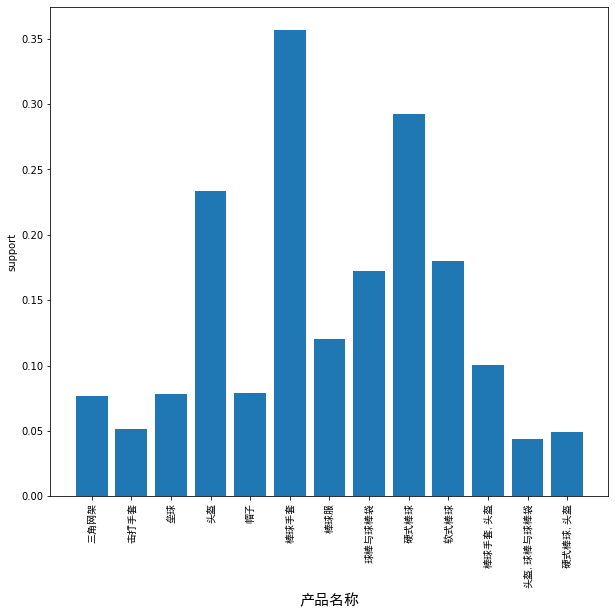

In [30]:
support_nums = support['support']
items = support['itemsets']
items_str = []
for i in items:
    items_str.append(','.join(list(i)))
    
from matplotlib import font_manager
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"./SimHei.ttf", size=15)
plt.figure(figsize=(10, 9))
plt.bar(items_str, support_nums)
plt.xlabel('产品名称', fontproperties=font)
plt.ylabel('support')
plt.xticks(rotation=90, fontsize=10, fontproperties=font)

plt.show()

In [ ]:
pip install mlxtend -i https://pypi.tuna.tsinghua.edu.cn/simple some-package

In [ ]:
pip install efficient_apriori